In [1]:
import numpy as np
import os
import glob
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt

In [2]:
IMG_HEIGHT = 64
IMG_WIDTH = 80
N_COMPONENTS = 20

# Assignment 1

In [3]:
class PCA:
    def __init__(self, n_components: int):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
    
    def fit(self, X: np.ndarray):
        self.mean_ = np.mean(X, axis=0)
        
        cov_matrix = np.cov(X, rowvar=False)
       
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.components_ = eigenvectors[:, sorted_indices][:, :self.n_components].T

    def transform(self, X: np.ndarray) -> np.ndarray:
        return (X - self.mean_) @ self.components_.T

# Assignment 2

In [4]:
# Reading the training images
train_face_vectors = []
train_labels = []

for person_path in (os.path.join("yalefaces", f"person-{i}") for i in range(1, 16)):
    label = os.path.basename(person_path)
    
    for img_path in glob.glob(os.path.join(person_path, "*")):
        img = resize(imread(img_path), (1, IMG_HEIGHT, IMG_WIDTH), anti_aliasing=True)
        
        train_face_vectors.append(img.flatten())
        train_labels.append(label)

X_train = np.array(train_face_vectors)
y_train = np.array(train_labels)

In [5]:
# Approximating the Principle Space having 20 dimensions
pca = PCA(n_components=N_COMPONENTS)
pca.fit(X_train)
pca.components_.shape

(20, 5120)

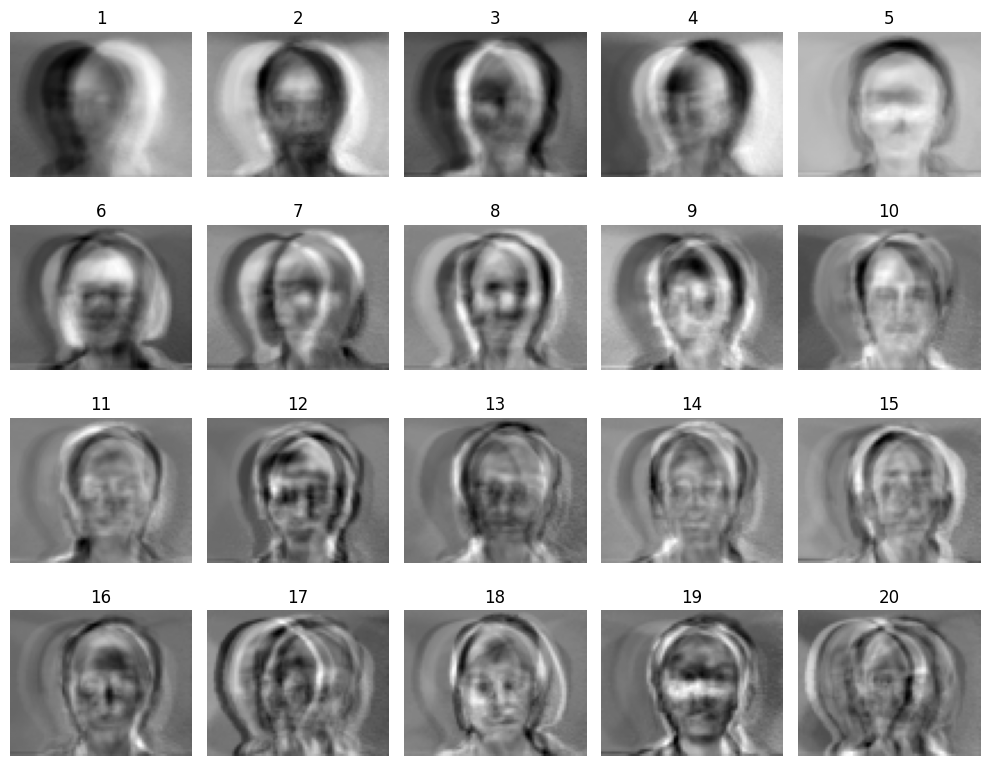

In [6]:
# Visualize the base of this Principle Space
eigenfaces = pca.components_.reshape(N_COMPONENTS, IMG_HEIGHT, IMG_WIDTH)
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.axis('off')
    ax.set_title(i + 1)

plt.tight_layout()
plt.show()

# Assignment 3

In [7]:
# Reading the testing images
test_face_vectors = []
test_labels = []      

for img_path in glob.glob(os.path.join("yalefaces", "test", "*")):
    filename = os.path.basename(img_path)
    label = filename.split('.')[0]
    
    img = resize(imread(img_path), (1, IMG_HEIGHT, IMG_WIDTH), anti_aliasing=True)
    
    test_face_vectors.append(img.flatten())
    test_labels.append(label)

X_test = np.array(test_face_vectors)
y_test = np.array(test_labels)

In [8]:
# Assign persons to the face images in testing data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

y_pred = []

for test_projection in X_test_pca:
    euclidean_distances = np.linalg.norm(X_train_pca - test_projection, axis=1)

    min_dist_idx = np.argmin(euclidean_distances)
    
    predicted_label = y_train[min_dist_idx]
    y_pred.append(predicted_label)

y_pred = np.array(y_pred)

In [9]:
# Evaluate the accuracy of this face recognition system
correct_predictions = np.sum(y_pred == y_test)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples

for true, pred in zip(y_test, y_pred):
    status = "Đúng" if true == pred else "Sai"
    print(f"{true:<10} -> {pred:<10} [{status}]")

print("-" * 30)
print(f"Tổng số ảnh test: {total_samples}")
print(f"Số dự đoán đúng: {correct_predictions}")
print(f"Độ chính xác (Accuracy): {accuracy * 100:.2f}%")

person-1   -> person-1   [Đúng]
person-10  -> person-10  [Đúng]
person-11  -> person-11  [Đúng]
person-12  -> person-12  [Đúng]
person-13  -> person-13  [Đúng]
person-14  -> person-6   [Sai]
person-15  -> person-15  [Đúng]
person-2   -> person-12  [Sai]
person-3   -> person-3   [Đúng]
person-4   -> person-4   [Đúng]
person-5   -> person-5   [Đúng]
person-6   -> person-6   [Đúng]
person-7   -> person-7   [Đúng]
person-8   -> person-7   [Sai]
person-9   -> person-9   [Đúng]
------------------------------
Tổng số ảnh test: 15
Số dự đoán đúng: 12
Độ chính xác (Accuracy): 80.00%
